In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df = pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [6]:
cat_columns = visa_df.select_dtypes(include='object').columns
num_columns = visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

***Numerical vs Numerical***
- to understand numerical columns relation we need to plot scatter plots
- scatter plots gives the relation between two numerical columns
- bar chart - pie chart - histogram - scatter plot
- scatter plot under matplotlib package
- **plt.scatter**

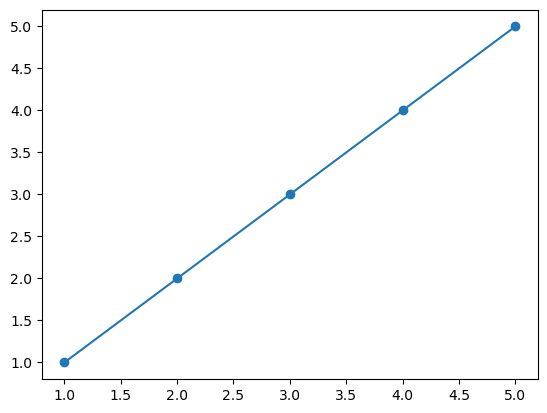

In [8]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

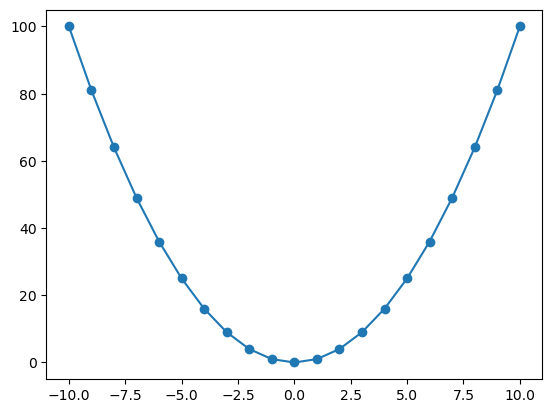

In [9]:
x1 = [i for i in range (-10,11,1)]
y1 = [(i*i) for i in x1]
plt.scatter(x1,y1)
plt.plot(x1,y1)
plt.show()

***Steps to follow to use it on numerical columns***
1. read one numerical column
2. read another numerical column
3. apply the scatter plot

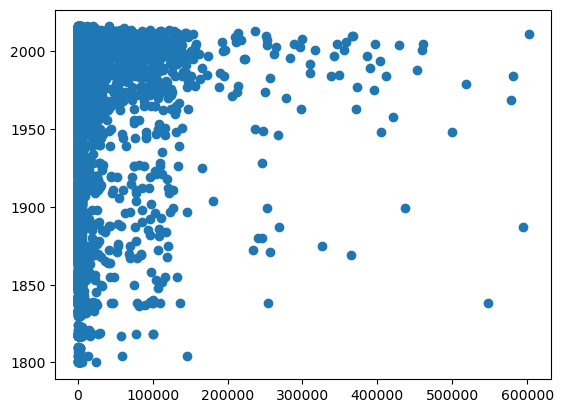

In [11]:
visa_no_of_employees = visa_df['no_of_employees'].values
visa_yr_of_estab = visa_df['yr_of_estab'].values
visa_prevailing_wage = visa_df['prevailing_wage']
plt.scatter(visa_no_of_employees,visa_yr_of_estab)
plt.show()

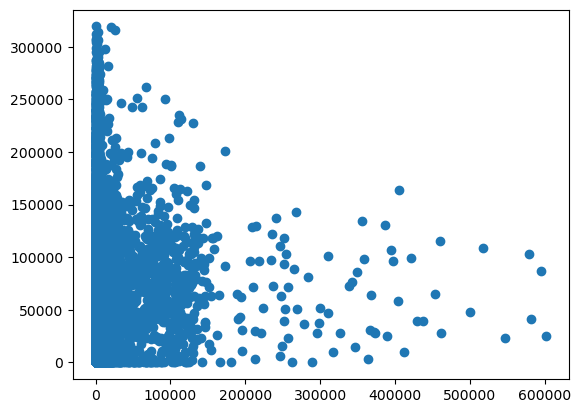

In [12]:
plt.scatter(visa_no_of_employees,visa_prevailing_wage)
plt.show()

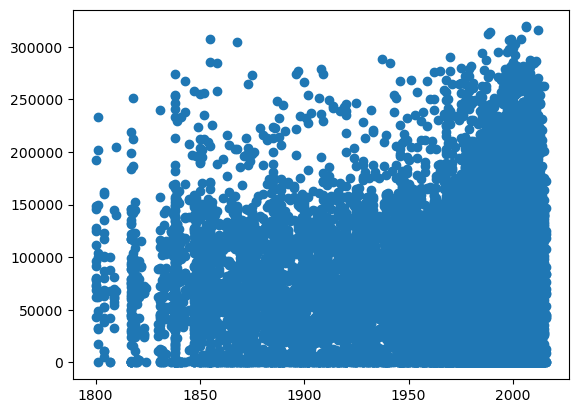

In [13]:
plt.scatter(visa_yr_of_estab,visa_prevailing_wage)
plt.show()

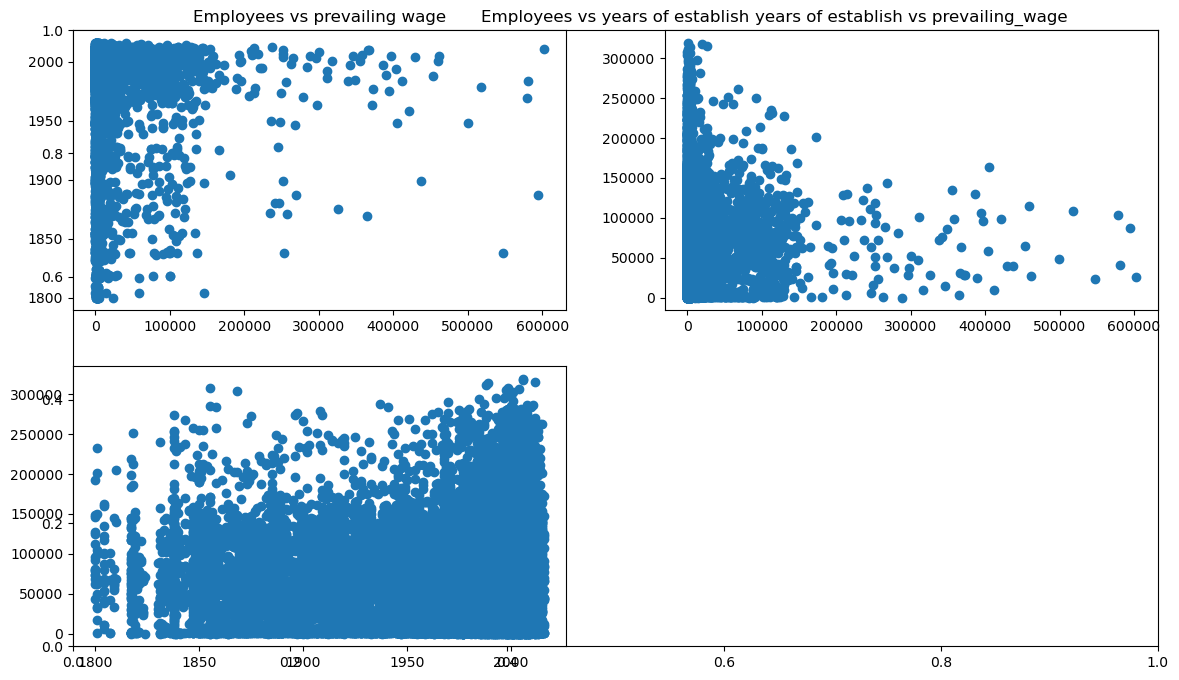

In [14]:
plt.figure(figsize = (14,8))
plt.title('Employees vs years of establish')
plt.subplot(2,2,1).scatter(visa_no_of_employees,visa_yr_of_estab)
plt.title('Employees vs prevailing wage')
plt.subplot(2,2,2).scatter(visa_no_of_employees,visa_prevailing_wage)
plt.title('years of establish vs prevailing_wage')
plt.subplot(2,2,3).scatter(visa_yr_of_estab,visa_prevailing_wage)
plt.show()

- implement the covariance function
- Covariance vs Correlations
    - Covariance will tell about whether columns have a relation or not
    - Covariance will explain about relationship status
        - positive relation
        - negative relation
        - no relation
          <img class="XqHOTb IGEbUc" alt="cov_{x,y}=\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}" src="https://www.gstatic.com/education/formulas2/553212783/en/covariance_formula.svg" role="img" data-csiid="by28ZrS4JrCOnesPhIj10QM_10" data-atf="0">
    - Correlations tells us about how much relation between two variable
        - it is denoted by 'r'
        - r varies from -1 to 1
        - -1 to 0 indicates a negative relation quantity
        - 0 to 1 indicates a positive relation quantity
        - 0 indicates a no relation quantity

           <img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="GzO8ZsXZGJ6L4-EPwZebgAw_14" data-atf="0">

In [16]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


***Heat Map***
- Heat map is one of the important visualization method, to show the matrix form of values
- its under ***Seaborn*** package
- in every matrix we have highest values and lowest values available
- heat map will give colour visualization
- Alos it will provide the colour bar, which colour indicates which value 

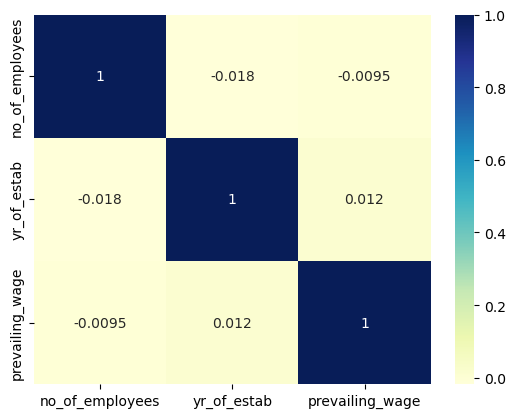

In [18]:
corr_visa_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_visa_data,annot=True,cmap="YlGnBu")
plt.show()

- By seeing the graph we might not say relation status
- it is best practice get the percentage of relation using correlation
- all 3 columns having approximately zero percentage of relation
- which indicates all the columns having no relation
- no relation means independent each other
- In ML we expect the input column should be independent to each other
- corr method gives matrix view
- we have 3 columns 3*3 totol 9 fields
- if a data has 20 columns then 20*20 total 400 fields
- thats why always go with heat map 

***16th August***

- To apply the map method for all the categorical columns
    1. We need to get unique labels
    2. we need to get numbers = len unique labels
    3. we need to create a dictionary 

In [22]:
unique_labels =sorted(visa_df ['case_status'].unique())
list1 = [i for i in range (len(unique_labels))]
dict1 = dict(zip(unique_labels,list1))
dict1

{'Certified': 0, 'Denied': 1}

In [23]:
{i:j for i,j in zip (unique_labels,list1)}

{'Certified': 0, 'Denied': 1}

In [24]:
{keys:values for keys,values in zip (unique_labels,list1)}

{'Certified': 0, 'Denied': 1}

In [25]:
visa_df['case_status_numercial'] = visa_df['case_status'].map(dict1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_numercial
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0


In [41]:
visa_df = pd.read_csv('Visadataset.csv')
cat_columns = visa_df.select_dtypes(include='object').columns
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [37]:
visa_df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [29]:
for i in cat_columns:
    unique_labels =sorted(visa_df[i].unique())
    list1 = [i for i in range (len(unique_labels))]
    dict1 = dict(zip(unique_labels,list1))
    visa_df[i] = visa_df[i].map(dict1)

visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


***Label Encoder***
- Label Encoder is a method to convert cat data to numerical data
- Label Encoderis the same way, how we did it above
- the for loop map we explored
- but the Label Encoder also do the same
- the is under **sickit-learn** we call it **sklearn**
- under sklearn, we have a class called as preprocessing
- because currently, we are doing data preprocessing only
- under a preprocessing class we have a method called as **Label Encoder**
- sklearn
    - preprocessing
    - Label Encoder
- any sklearn packages has 3 steps
    1. Read the package
    2. save the package
    3. apply the fit transform to data 

In [27]:
# step1: Read the package/load method
from sklearn.preprocessing import LabelEncoder
#step2: Save the package/ call the method
le = LabelEncoder()
visa_df['case_status'] = le.fit_transform(visa_df['case_status'])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


In [43]:
visa_df = pd.read_csv('Visadataset.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_columns:
    visa_df[i] = le.fit_transform(visa_df[i])

visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


***Fit and Transform***
- fit means developing the logic
- transform means to process the logic
- if we observe in the map method first we developed dictionary logic
- then we apply that dictionary to the column
- Developing the dictionary is fit
- apply the dictionary to columns means we are transforming the data to numerical data
- whenever we are transforming to change the data then use **Fit transforming**
- if we are not changing the data then only **Fit**

***np.where***
- using np.where also we can change the categorical data to numerical
- but np.where is only for binary condition
- np.where is same as if-else
- if condition is True: we will apply True value
- if condition is False: we will apply False value
- so np.where use for only binary labels
- a column should only have 2 unique values

In [57]:
visa_df = pd.read_csv('Visadataset.csv')
con = visa_df ['case_status'] =='Certified'
visa_df['case_status'] = np.where(con,0,1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


***One Hot Encoder***
- one hot means one will be ON the another will OFF
- ON represents with 1
- OFF represents with 0
- for Eg:
    - Case stats has two unique labels
        - Certified
        - Denied
- One hot Encoder creates new columns which is equal to number of unique labels
- for Eg: Case status will create two extra columns
    - case_status_Certified
    - case_status_Denied